In [284]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [285]:
#Loading the dataset
titanic_data = pd.read_csv('train.csv')

titanic_data_new = titanic_data.copy(deep = True)
# changing the id column to a string
titanic_data_new = titanic_data_new.astype({"PassengerId":str})

#Print the first 5 rows of the dataframe.
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
#titanic_data.shape
titanic_data_new.shape

(891, 12)

In [287]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#titanic_data.info(verbose=True)
titanic_data_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [288]:
#titanic_data.describe()
titanic_data_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [289]:
#titanic_data.describe().T
titanic_data_new.describe().T


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


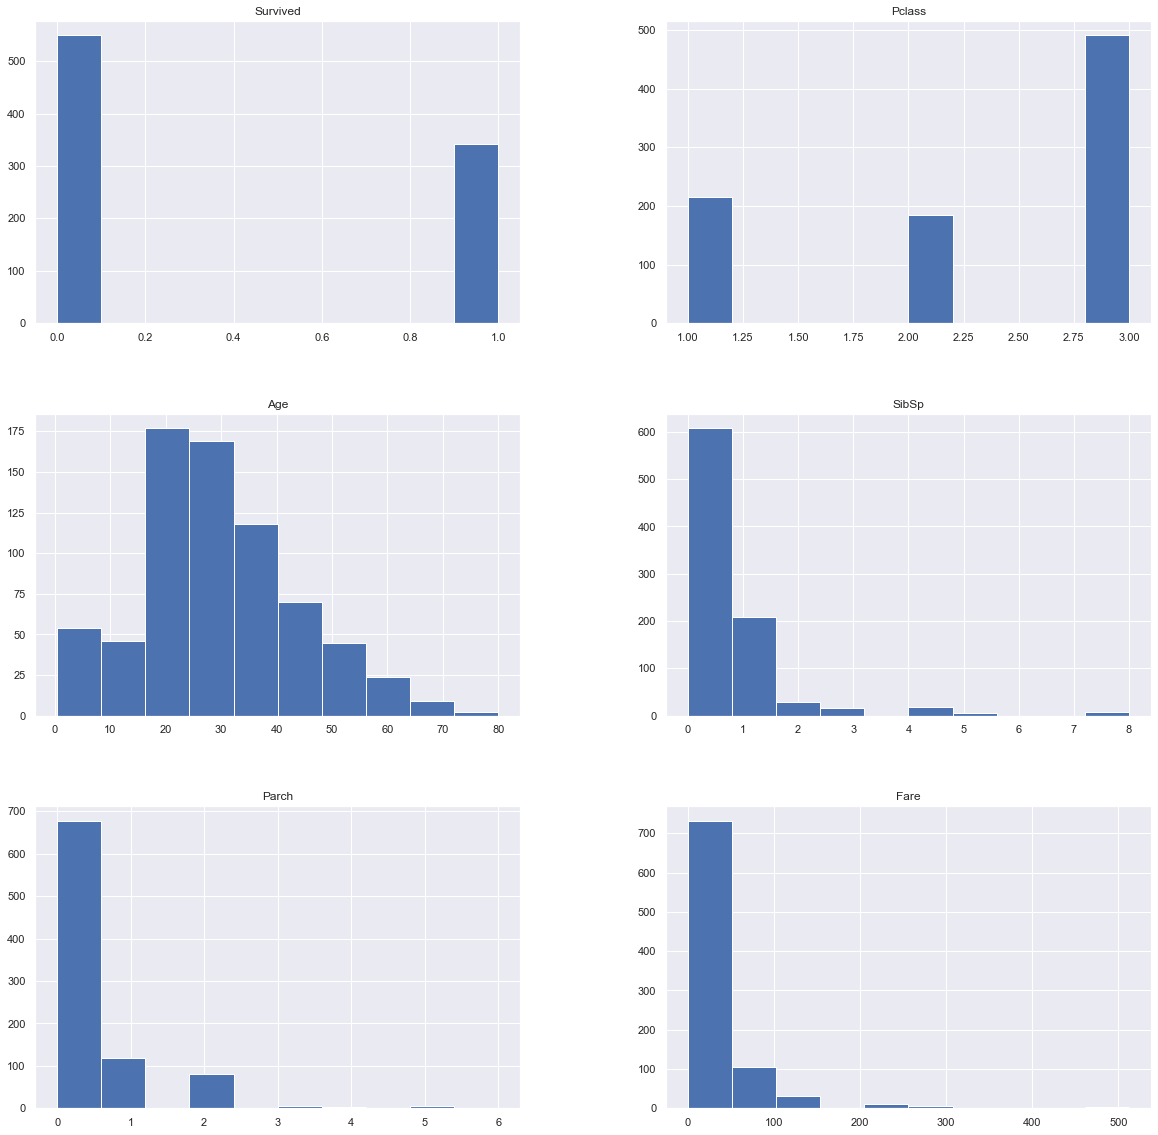

In [290]:
#p = titanic_data.hist(figsize = (20,20))

p = titanic_data_new.hist(figsize = (20,20))

In [291]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
# sns.countplot(y=titanic_data.dtypes ,data=titanic_data)
# plt.xlabel("count of each data type")
# plt.ylabel("data types")
# plt.show()

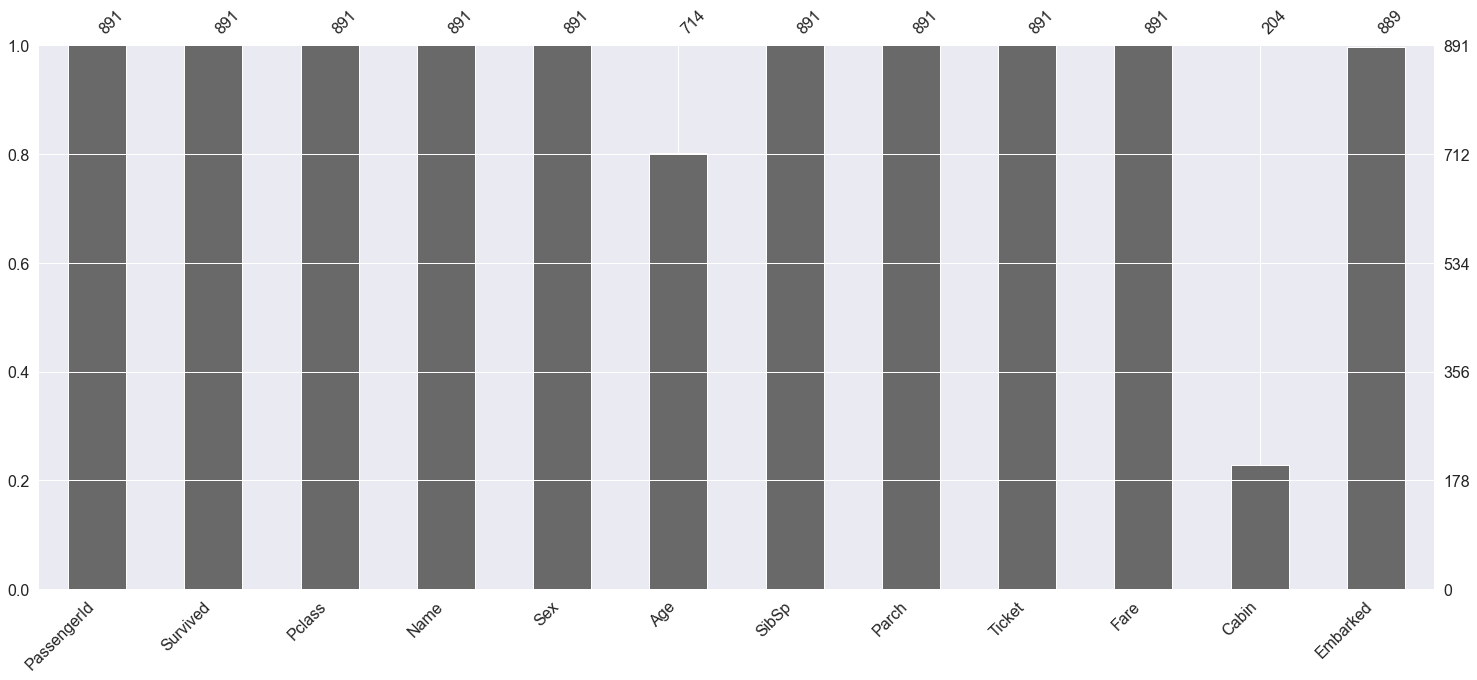

In [292]:
## null count analysis
import missingno as msno
p=msno.bar(titanic_data)

<AxesSubplot:>

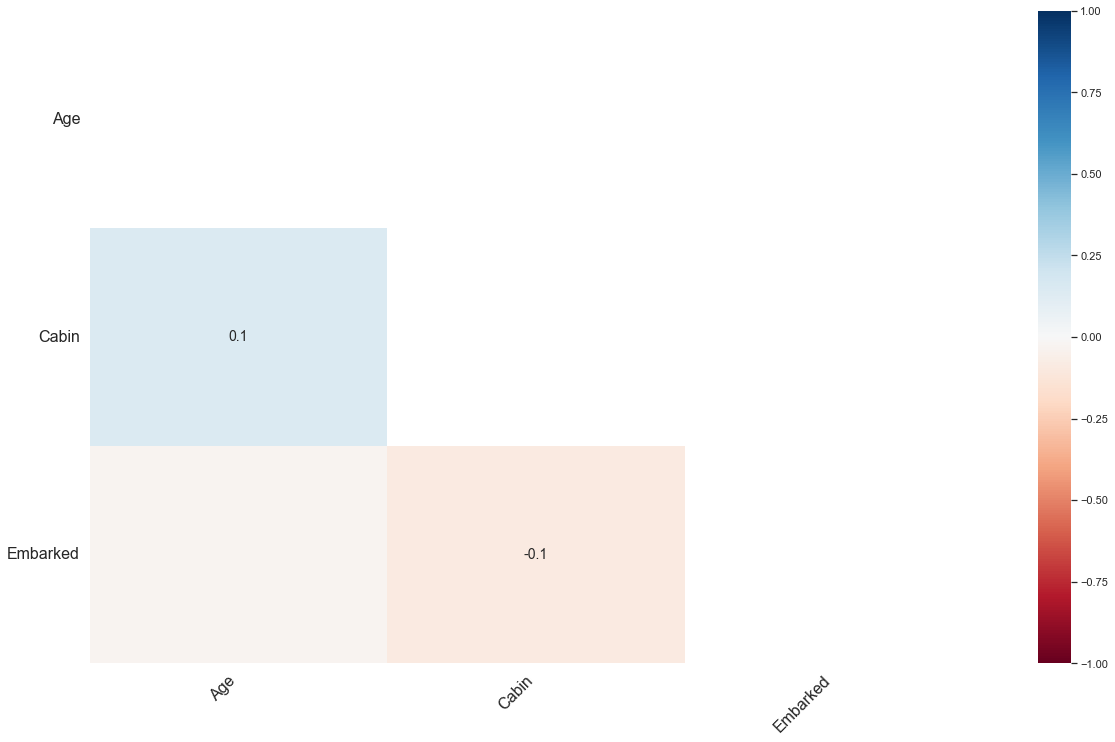

In [293]:
#heatmap is used to see if there is a correlation between the missing values in the data
msno.heatmap(titanic_data)
#1 shows correlation with another column and 0 shows no correlation and -1 shows anticorrelation

<AxesSubplot:>

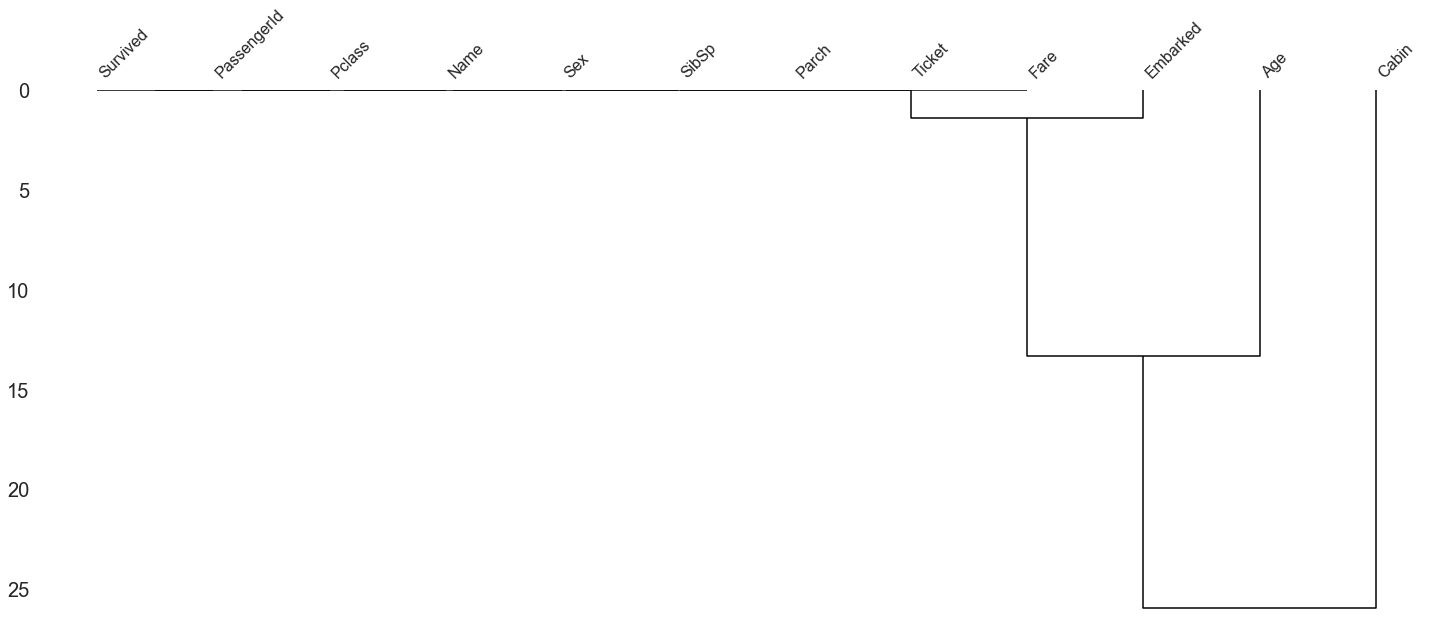

In [294]:
msno.dendrogram(titanic_data)
# values grouped together at zero indicate that they are complete 

In [295]:
print(titanic_data_new.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [296]:
#titanic_data_copy = titanic_data.copy(deep = True)
titanic_data_copy = titanic_data_new.copy(deep = True)
# #titanic_data_copy[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']] = titanic_data_copy[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].replace(0,np.NaN)
print(titanic_data_copy.isna().sum())
# # need to have multiple replaces 
# #replace missing age  with 0 , potentially with mean 
# titanic_data_copy[['Age']] = titanic_data_copy[['Age']].fillna(0)
# #replace missing cabin with NaN
# titanic_data_copy[['Cabin']] = titanic_data_copy[['Cabin']].fillna('none')
# #replace embarked with ? SCQ are all different port names 
# titanic_data_copy[['Embarked']] = titanic_data_copy[['Embarked']].fillna('none')
# ## showing the count of Nans
# print(titanic_data_copy.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [297]:
titanic_data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [298]:
# #replace missing age  with 0 , potentially with mean 
titanic_data_copy[['Age']]=titanic_data_copy[['Age']].fillna(titanic_data_copy[['Age']].mean())
#titanic_data_copy[['Age']].fillna(titanic_data_copy[['Age']].median(), inplace=True)
#replace missing cabin with NaN
titanic_data_copy[['Cabin']] = titanic_data_copy[['Cabin']].fillna('none')
#replace embarked with ? SCQ are all different port names 
titanic_data_copy[['Embarked']] = titanic_data_copy[['Embarked']].fillna('none')
print(titanic_data_copy.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [299]:
titanic_data_copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,none,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,none,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,none,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,none,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,none,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [300]:
# # need to decide whethe rto drop nan , use median or use mean
# #have we excluded correct values 
# #titanic_data_copy['PassengerId'].fillna(titanic_data_copy['PassengerId'].mean(), inplace = True)
# titanic_data_copy['Survived'].fillna(titanic_data_copy['Survived'].mean(), inplace = True)
# titanic_data_copy['Pclass'].fillna(titanic_data_copy['Pclass'].median(), inplace = True)
# #titanic_data_copy['Name'].fillna(titanic_data_copy['Name'].median(), inplace = True)
# #itanic_data_copy['Sex'].fillna(titanic_data_copy['Sex'].median(), inplace = True)
# titanic_data_copy['Age'].fillna(titanic_data_copy['Age'].median(), inplace = True)
# titanic_data_copy['SibSp'].fillna(titanic_data_copy['SibSp'].median(), inplace = True)
# titanic_data_copy['Parch'].fillna(titanic_data_copy['Parch'].median(), inplace = True)
# #titanic_data_copy['Ticket'].fillna(titanic_data_copy['Ticket'].median(), inplace = True)
# titanic_data_copy['Fare'].fillna(titanic_data_copy['Fare'].median(), inplace = True)
# #titanic_data_copy['Cabin'].fillna(titanic_data_copy['Cabin'].median(), inplace = True)
# #titanic_data_copy['Embarked'].fillna(titanic_data_copy['Embarked'].median(), inplace = True)

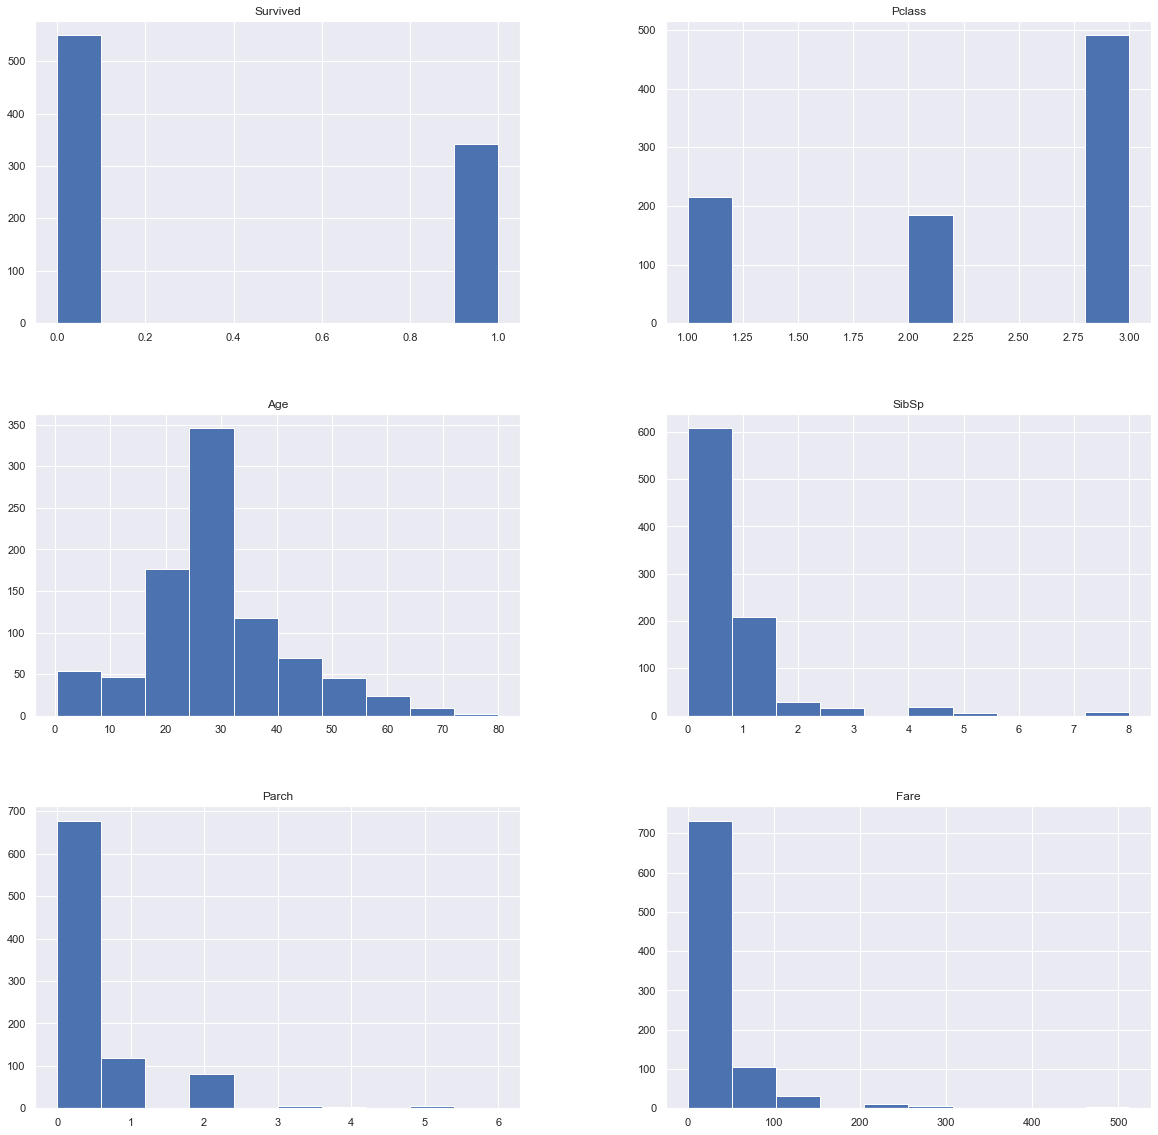

In [301]:
p = titanic_data_copy.hist(figsize = (20,20))

In [302]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(titanic_data_copy.drop(["Outcome"],axis = 1),),
        columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

       

KeyError: "['Outcome'] not found in axis"

In [ ]:
X.head()